<a href="https://colab.research.google.com/github/pranjal1005/summer-internship-projects/blob/main/trainingday15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv('supply_chain.csv')

In [ ]:
df.head(3)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282


In [ ]:
!pip install plotly

In [ ]:
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

In [ ]:
df.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239830,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976920,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [ ]:
fig = px.scatter(df , x='Price',
                 y= 'Revenue generated',
                 color= 'Product type',
                 hover_data= ['Number of products sold'],
                 trendline="ols")
fig.show()

In [ ]:
# now lets have a look at the sales by product type:

In [ ]:
sales_data = df.groupby('Product type')['Number of products sold'].sum().reset_index()
# sales data

In [ ]:
pie_chart = px.pie(sales_data, names='Product type',
                   values='Number of products sold',
                   title='Sales by Product Type',
                   hover_data = ['Number of products sold'],
                   hole= 0.5,
                   color_discrete_sequence= px.colors.qualitative.Pastel)

pie_chart.update_traces(textposition='inside', textinfo='percent+label')
pie_chart.update_layout(uniformtext_minsize=13, uniformtext_mode='hide')
pie_chart.show()

In [ ]:
# now lets have a look at the total revenue generated from shipping carriers:

In [ ]:
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [ ]:
total_revenue = df.groupby('Shipping carriers')['Revenue generated'].sum().reset_index()
fig = go.Figure()
fig.add_trace(go.Bar(x=total_revenue['Shipping carriers'],
                             y=total_revenue['Revenue generated']))
fig.update_layout(title='Total Revenue Generated by Shipping Carriers',
                  xaxis_title='Shipping carriers',
                  yaxis_title='Total Revenue')
fig.show()

In [ ]:
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [ ]:
total_revenue

,Shipping carriers,Revenue generated
0,Carrier A,142629.994607
1,Carrier B,250094.646988
2,Carrier C,184880.177145


In [ ]:
# Now lets have a look at the average lead time and average manufacturing cost for all products of the company:

In [ ]:
avg_lead_time = df.groupby('Product type')['Lead time'].mean().reset_index()
# avg lead time

In [ ]:
avg_manufacturing_cost = df.groupby('Product type')['Manufacturing costs'].mean().reset_index()
# avg manufacturing cost

In [ ]:
result= pd.merge(avg_lead_time, avg_manufacturing_cost, on='Product type')


In [ ]:
result.rename(columns={'Lead time': 'Average Lead Time',
                       'Manufacturing costs': 'Average Manufacturing Cost'},
               inplace=True)


In [ ]:
print(result)

  Product type  Average Lead Time  Average Manufacturing Cost
0    cosmetics          13.538462                   43.052740
1     haircare          18.705882                   48.457993
2     skincare          18.000000                   48.993157


In [ ]:
# SKU = Stock Keeping Unit
# now lets analyze tjhe revenue generated by each SKU

In [ ]:
revenue_chart = px.line(df, x='SKU',
                        y= 'Revenue generated',
                        title = 'Revenue Generated by SKU')
revenue_chart.show()

In [ ]:
# now lets have a look at the stock levels of each SKU:

In [ ]:
stock_chart = px.line(df, x='SKU',
                      y= 'Stock levels',
                      title = 'Stock Levels by SKU')
stock_chart.show()

In [ ]:
# Now lets have a look at the order quantity of each SKU:

In [ ]:
order_quantity_chart = px.bar(df, x='SKU',
                               y= 'Order quantities',
                               title = 'Order Quant|ity by SKU')
order_quantity_chart.show()

In [ ]:
# Now lets analyze the shipping cost of carriers:

In [ ]:
shipping_cost_chart = px.bar(df, x='Shipping carriers',
                             y= 'Shipping costs',
                             title = 'Shipping Cost by Carrier')
shipping_cost_chart.show()

In [ ]:
# now lets have a look at the cost distribution by transportation mode:

In [ ]:
transportation_chart = px.pie(df,
                              values= 'Costs',
                              names= 'Transportation modes',
                              title= 'Cost Distribution by Transportation Mode',
                              hole= 0.5,
                              color_discrete_sequence= px.colors.qualitative.Pastel)
transportation_chart.show()

In [ ]:
df = pd.read_csv('linkedin_reviews.csv')

In [ ]:
df.head(3)

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1


In [ ]:
df.columns

Index(['Review', 'Rating'], dtype='object')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB


In [ ]:
# exploratory data anlysis

In [ ]:
# Plotting the Distribution of Ratings

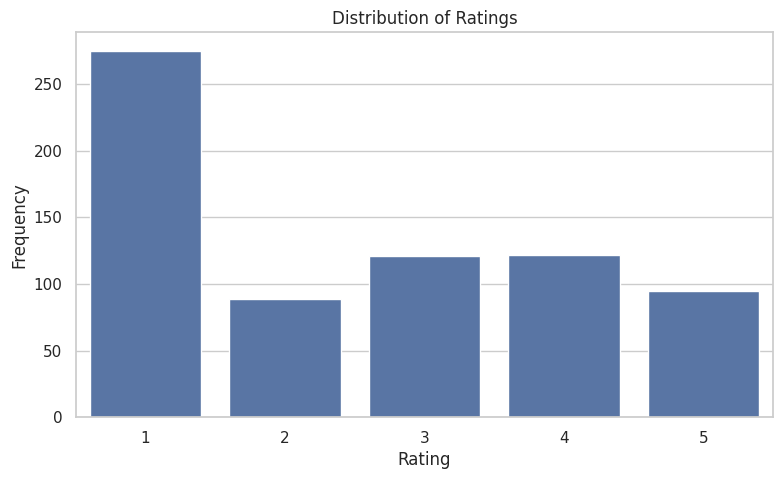

In [ ]:
sns.set(style = 'whitegrid')
plt.figure(figsize=(9, 5))
sns.countplot(data = df , x= 'Rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Adding Sentiment Labels in the data

In [ ]:
# Installing textblob ---> it helps in cleaning the data removes repeating , punchuation and other kind of things

In [ ]:
!pip install textblob

In [ ]:
from textblob import TextBlob

In [ ]:
def textblob_sentiment_analysis(review):
    sentiment = TextBlob(review).sentiment
    if sentiment.polarity > 0.1:
        return 'Positive'
    elif sentiment.polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

In [ ]:
df['Sentiment'] = df['Review'].apply(textblob_sentiment_analysis)

In [ ]:
df.head()

,Review,Rating,Sentiment
0,Does absolutely nothing for a LinkedIn beginne...,1,Negative
1,Force close(galaxy tab),1,Neutral
2,Slow and it tries to upload your contacts with...,1,Negative
3,Add ability to customize the profile and move ...,4,Neutral
4,"Good app, but it's a pain that it's not possib...",4,Positive


In [ ]:
# Analyzing App Reviews Sentiments

In [ ]:
sentiment_distribution = df['Sentiment'].value_counts()
sentiment_distribution

,count
Sentiment,
Positive,298
Neutral,297
Negative,107
